## Final Project Submission

Please fill out:
* Student name: Alaska Lam
* Student pace:  part time 
* Scheduled project review date/time: Weds March 31st, 2021 3:15pm
* Instructor name: Amber Yandow
* Blog post URL: www.medium.com 

In [70]:
#Import Python libraries

import numpy as np
import pandas as pd

import scipy.stats as stats
import statsmodels.api as sm

from sklearn import preprocessing 

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns
import csv
from pylab import *

import nltk
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.naive_bayes import MultinomialNB


np.random.seed(0)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/wildalaska/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Importing Data and EDA/Cleaning and Preprocessing

In [72]:
file = 'mbti_1.csv'

df = pd.read_csv(file)
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [73]:

print (df['type'].nunique())
print(df['type'].unique())


#16 different personality types rep'd here


16
['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']


In [74]:
#checking for duplicates and removing

df[df.duplicated()]


,type,posts


In [6]:
df[df.isna().any(axis=1)]

#checking for null/missing values 

,type,posts


In [75]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [76]:
#changing the type column name

df = df.rename(columns = {'type': 'personality_type'})
df.head()

,personality_type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [77]:
#categorize based on E or I

def isextraversion(personality_type):
    for x in personality_type:
        if 'E' in x:
            return 'E'
        else:
            return 'I'

#print is_in('E',personality_type)

#df['newcolumn'] = df.type.apply()


In [78]:
df['energy'] = df.personality_type.apply(isextraversion)

In [79]:
df.head(10)

,personality_type,posts,energy
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I
1,ENTP,'I'm finding the lack of me in these posts ver...,E
2,INTP,'Good one _____ https://www.youtube.com/wat...,I
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I
4,ENTJ,'You're fired.|||That's another silly misconce...,E
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,I
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",I
7,INTJ,'I tend to build up a collection of things on ...,I
8,INFJ,"I'm not sure, that's a good question. The dist...",I
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,I


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   personality_type  8675 non-null   object
 1   posts             8675 non-null   object
 2   energy            8675 non-null   object
dtypes: object(3)
memory usage: 203.4+ KB


In [80]:
#print(df.energy.count())

print (df[df.energy == 'E'].count())

print (df[df.energy == 'I'].count())

#way more skewed towards I than E data, run smote later 

personality_type    1999
posts               1999
energy              1999
dtype: int64
personality_type    6676
posts               6676
energy              6676
dtype: int64


## Data cleaning and preprocessing

In [14]:
#make stopwords list

stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list += ["''", '""', '``','@','|',"'"]

In [81]:
#Getting rid of upper cases. This avoids having multiple copies of the same words 

df['lower_posts'] = df['posts'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df['lower_posts'].head()

0    'http://www.youtube.com/watch?v=qsxhcwe3krw|||...
1    'i'm finding the lack of me in these posts ver...
2    'good one _____ https://www.youtube.com/watch?...
3    'dear intp, i enjoyed our conversation the oth...
4    'you're fired.|||that's another silly misconce...
Name: lower_posts, dtype: object

In [82]:
df['lower_posts'].head(20)

0     'http://www.youtube.com/watch?v=qsxhcwe3krw|||...
1     'i'm finding the lack of me in these posts ver...
2     'good one _____ https://www.youtube.com/watch?...
3     'dear intp, i enjoyed our conversation the oth...
4     'you're fired.|||that's another silly misconce...
5     '18/37 @.@|||science is not perfect. no scient...
6     'no, i can't draw on my own nails (haha). thos...
7     'i tend to build up a collection of things on ...
8     i'm not sure, that's a good question. the dist...
9     'https://www.youtube.com/watch?v=w8-egj0y8qs||...
10    'one time my parents were fighting over my dad...
11    'https://www.youtube.com/watch?v=plaaikvhvzs||...
12    'joe santagato - entp|||enfj or entp? i'm not ...
13    'fair enough, if that's how you want to look a...
14    'basically this... https://youtu.be/1ph5c1jkhl...
15    'your comment screams intj, bro. especially th...
16    'some of these both excite and calm me: butts ...
17    'i think we do agree. i personally don't c

In [83]:
df.lower_posts.head()

0    'http://www.youtube.com/watch?v=qsxhcwe3krw|||...
1    'i'm finding the lack of me in these posts ver...
2    'good one _____ https://www.youtube.com/watch?...
3    'dear intp, i enjoyed our conversation the oth...
4    'you're fired.|||that's another silly misconce...
Name: lower_posts, dtype: object

In [19]:
# df['lower_posts2'] = df['lower_posts'].str.replace('http\S+|www.\S+', '', case=False)

#getting rid of links

In [84]:
df.head()


,personality_type,posts,energy,lower_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...,E,'i'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,'good one _____ https://www.youtube.com/watch?...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,"'dear intp, i enjoyed our conversation the oth..."
4,ENTJ,'You're fired.|||That's another silly misconce...,E,'you're fired.|||that's another silly misconce...


In [21]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list += ["''", '""', '``','@','|',"'"]

In [86]:
df['stopwords'] = df['lower_posts'].apply(lambda x:  len([x for x in x.split() if x in stop]))
print (df[['lower_posts','stopwords']].head(10))

print(df['stopwords'].mean())

#how many stopwords do we have in the raw data?

                                         lower_posts  stopwords
0  'http://www.youtube.com/watch?v=qsxhcwe3krw|||...        236
1  'i'm finding the lack of me in these posts ver...        556
2  'good one _____ https://www.youtube.com/watch?...        359
3  'dear intp, i enjoyed our conversation the oth...        491
4  'you're fired.|||that's another silly misconce...        472
5  '18/37 @.@|||science is not perfect. no scient...        717
6  'no, i can't draw on my own nails (haha). thos...        620
7  'i tend to build up a collection of things on ...        588
8  i'm not sure, that's a good question. the dist...        330
9  'https://www.youtube.com/watch?v=w8-egj0y8qs||...        555
567.8212103746398


In [97]:
#removing stopwords 

df['lower_postsnostopwords'] = df['lower_posts'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords_list))
df['lower_postsnostopwords'].head()




0    'http://www.youtube.com/watch?v=qsxhcwe3krw|||...
1    'i'm finding lack posts alarming.|||sex boring...
2    'good one _____ https://www.youtube.com/watch?...
3    'dear intp, enjoyed conversation day. esoteric...
4    'you're fired.|||that's another silly misconce...
Name: lower_postsnostopwords, dtype: object

In [25]:
#df['lower_desc'] = df['lower_desc'].apply(lambda x: " ".join(x for x in x.split() if x not in (";", ":")

In [98]:
df['lower_postsnostopwords'].head(25)

0     'http://www.youtube.com/watch?v=qsxhcwe3krw|||...
1     'i'm finding lack posts alarming.|||sex boring...
2     'good one _____ https://www.youtube.com/watch?...
3     'dear intp, enjoyed conversation day. esoteric...
4     'you're fired.|||that's another silly misconce...
5     '18/37 @.@|||science perfect. scientist claims...
6     'no, can't draw nails (haha). done professiona...
7     'i tend build collection things desktop use fr...
8     i'm sure, that's good question. distinction tw...
9     'https://www.youtube.com/watch?v=w8-egj0y8qs||...
10    'one time parents fighting dad's affair dad pu...
11    'https://www.youtube.com/watch?v=plaaikvhvzs||...
12    'joe santagato entp|||enfj entp? i'm sure type...
13    'fair enough, that's want look it. like stated...
14    'basically this... https://youtu.be/1ph5c1jkhl...
15    'your comment screams intj, bro. especially us...
16    'some excite calm me: butts bodies brains comm...
17    'i think agree. personally consider alpha,

In [27]:
## remove all punctuation except for certain things like at, question marks, ellipses and exclamation points

# remove = dict.fromkeys(map(ord, '\n' + string.punctuation.replace('@','') ))

# df['lower_desc'] = df['lower_desc'].apply(lambda x: " ".join(x.translate(remove) for x in x.split() if x not in stopwords_list))
# df['lower_desc'].head(10)

# hmm most punctuation went away now, there aren't any at marks either frown face 

In [99]:
post_str = ' '.join(df['lower_postsnostopwords'].tolist())

In [100]:
print (type(post_str))


<class 'str'>


In [122]:
df.lower_postsnostopwords.head()

0    'http://www.youtube.com/watch?v=qsxhcwe3krw|||...
1    'i'm finding lack posts alarming.|||sex boring...
2    'good one _____ https://www.youtube.com/watch?...
3    'dear intp, enjoyed conversation day. esoteric...
4    'you're fired.|||that's another silly misconce...
Name: lower_postsnostopwords, dtype: object

In [164]:
df['lower_postsnostopwords2'] = df['lower_postsnostopwords']

In [191]:
# test_str = "hi !"
# punc = '''!()-[]{};:'"\,<>/@#$%^&*_~''' 

# for ele in test_str:  
#     if ele in punc:  
#         test_str = test_str.replace(ele, "") 

# print (test_str)

hi 


In [199]:
# import re    


In [213]:
# def clean_punc(text):
# #     text = re.sub('…', ' ', text)
# #     text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
#     text = re.sub('\w*\d\w*', ' ', text)
#     text = re.sub('[''""]', ' ', text)
#     return text

In [207]:
# def newpunc(text):
#     text = re.sub(ur"\p[^\P{P}!]+", "", text)
#     return text


# re.sub(ur"\p{P}+", "", txt)

# # [^\P{P}-]+

In [214]:
# df['new'] = df['lower_postsnostopwords2'].apply(clean_punc) #applying the removepunc function to a column

In [195]:
#removing punctuation? exclamation marks can be important and so can ellipses and multiple question marks etc
#went ahead and removed the at symbol and the vertical lines
#want exclamation point, question mark, period

# initializing punctuations string  
# test_str = df.lower_postsnostopwords2
#test_str = df.lower_posts
# punc = '''!()-[]{};:'"\,<>/@#$%^&*_~'''  #the punctuation that I don't want in here
  
# # Removing punctuations in string 
# # Using loop + punctuation string 
# def removepunc(test_str):
#     for ele in test_str:  
#         if ele in punc:  
#             test_str = test_str.replace(ele, "")
    
  
    
# # removepunc(test_str)


In [196]:
# df['new'] = df['lower_postsnostopwords2'].apply(removepunc) #applying the removepunc function to a column

In [215]:
df.new.head()

0    'http://www.youtube.com/watch?v= |||http:// .m...
1    'i'm finding lack posts alarming.|||sex boring...
2    'good one _____ https://www.youtube.com/watch?...
3    'dear intp, enjoyed conversation day. esoteric...
4    'you're fired.|||that's another silly misconce...
Name: new, dtype: object

In [217]:
df.head()

,personality_type,posts,energy,lower_posts,stopwords,lower_posts2,lower_postsnostopwords,lower_postsnostopwords2,new
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,236,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v= |||http:// .m...
1,ENTP,'I'm finding the lack of me in these posts ver...,E,'i'm finding the lack of me in these posts ver...,556,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,'good one _____ https://www.youtube.com/watch?...,359,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,"'dear intp, i enjoyed our conversation the oth...",491,"'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric..."
4,ENTJ,'You're fired.|||That's another silly misconce...,E,'you're fired.|||that's another silly misconce...,472,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...


In [ ]:
# def remove_punctuations(text):
#     for punctuation in string.punctuation:
#         text = text.replace(punctuation, '')
#     return text


# df["new_column"] = df['review'].apply(remove_punctuations)


In [155]:
#change this to apply to the whole column

# test_str

0       'http://www.youtube.com/watch?v=qsxhcwe3krw|||...
1       'i'm finding lack posts alarming.|||sex boring...
2       'good one _____ https://www.youtube.com/watch?...
3       'dear intp, enjoyed conversation day. esoteric...
4       'you're fired.|||that's another silly misconce...
                              ...                        
8670    'https://www.youtube.com/watch?v=t8edhb_h908||...
8671    'so...if thread already exists someplace else ...
8672    'so many questions things. would take purple p...
8673    'i conflicted right comes wanting children. ho...
8674    'it long since personalitycafe although seem c...
Name: lower_postsnostopwords2, Length: 8675, dtype: object

In [123]:
# df['lower_postsnostopwords2'] = df['lower_postsnostopwords']

In [124]:
# df.head()

,personality_type,posts,energy,lower_posts,stopwords,lower_posts2,lower_postsnostopwords,lower_postsnostopwords2
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,236,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...,E,'i'm finding the lack of me in these posts ver...,556,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,'good one _____ https://www.youtube.com/watch?...,359,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,"'dear intp, i enjoyed our conversation the oth...",491,"'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric..."
4,ENTJ,'You're fired.|||That's another silly misconce...,E,'you're fired.|||that's another silly misconce...,472,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...


In [220]:
remove = dict.fromkeys(map(ord, '\n' + string.punctuation.replace('!','') ))

df['lower_postswithoutpunc'] = df['lower_postsnostopwords'].apply(lambda x: " ".join(x.translate(remove) for x in x.split() if x not in stopwords_list))
df['lower_postswithoutpunc'].head(10)




0    httpwwwyoutubecomwatchvqsxhcwe3krwhttp41mediat...
1    im finding lack posts alarmingsex boring posit...
2    good one  httpswwwyoutubecomwatchvfhigbolffgwo...
3    dear intp enjoyed conversation day esoteric ga...
4    youre firedthats another silly misconception a...
5    1837 science perfect scientist claims is scien...
6    no cant draw nails haha done professionals nai...
7    i tend build collection things desktop use fre...
8    im sure thats good question distinction two de...
9    httpswwwyoutubecomwatchvw8egj0y8qsim position ...
Name: lower_postswithoutpunc, dtype: object

In [221]:
df['lower_postswithoutpunc'].head(20)


0     httpwwwyoutubecomwatchvqsxhcwe3krwhttp41mediat...
1     im finding lack posts alarmingsex boring posit...
2     good one  httpswwwyoutubecomwatchvfhigbolffgwo...
3     dear intp enjoyed conversation day esoteric ga...
4     youre firedthats another silly misconception a...
5     1837 science perfect scientist claims is scien...
6     no cant draw nails haha done professionals nai...
7     i tend build collection things desktop use fre...
8     im sure thats good question distinction two de...
9     httpswwwyoutubecomwatchvw8egj0y8qsim position ...
10    one time parents fighting dads affair dad push...
11    httpswwwyoutubecomwatchvplaaikvhvzs51 oi went ...
12    joe santagato entpenfj entp im sure type yetyo...
13    fair enough thats want look it like stated bef...
14    basically this httpsyoutube1ph5c1jkhlucan chee...
15    your comment screams intj bro especially usele...
16    some excite calm me butts bodies brains commun...
17    i think agree personally consider alpha be

In [30]:
# import re
# import string
# remove = dict.fromkeys(map(ord, '\n' + string.punctuation.replace('@','')))
#sample = 'The quick brown fox, like, totally jumped, @man!'
#sample.translate(remove)


In [222]:
df['lower_postsnolinks'] = df['lower_postswithoutpunc'].str.replace('http\S+|www.\S+', '', case=False)

# getting rid of links

In [223]:
df.lower_postsnolinks.head(20)

0      intj moments  sportscenter top ten plays  pra...
1     im finding lack posts alarmingsex boring posit...
2     good one   course say know thats blessing curs...
3     dear intp enjoyed conversation day esoteric ga...
4     youre firedthats another silly misconception a...
5     1837 science perfect scientist claims is scien...
6     no cant draw nails haha done professionals nai...
7     i tend build collection things desktop use fre...
8     im sure thats good question distinction two de...
9      position actually let go person due various r...
10    one time parents fighting dads affair dad push...
11     oi went break months ago together 4 years pla...
12    joe santagato entpenfj entp im sure type yetyo...
13    fair enough thats want look it like stated bef...
14    basically this  cheezburgri fond top hat too c...
15    your comment screams intj bro especially usele...
16    some excite calm me butts bodies brains commun...
17    i think agree personally consider alpha be

In [224]:
df['char_count'] = df['lower_postsnolinks'].str.len() #how many characters do we have in description? 
print(df[['lower_postsnolinks','char_count']].head())
print(df['char_count'].mean())

                                  lower_postsnolinks  char_count
0   intj moments  sportscenter top ten plays  pra...        2165
1  im finding lack posts alarmingsex boring posit...        3897
2  good one   course say know thats blessing curs...        3226
3  dear intp enjoyed conversation day esoteric ga...        3827
4  youre firedthats another silly misconception a...        3452
4404.778443804034


In [225]:
#most frequent and least frequent words 


freq = pd.Series(' '.join(df['lower_postsnolinks']).split()).value_counts()[:20]
freq

#not sure how important this is, there's a lot of things that really should be stopwords

like      67082
im        65036
think     48588
people    43947
know      35544
really    33982
would     33702
one       33454
get       29900
time      25284
ive       23845
feel      22550
much      21898
it        21336
me        21117
love      19787
say       19536
things    19529
good      18975
want      18894
dtype: int64

## Tokenize all the posts

In [227]:
#desc_str = ' '.join(df['lowerdesc2'].tolist())
#print(desc_str)[:10]
#making a long string of all the words in the posts

post_str = ' '.join(df['lower_postsnolinks'].tolist())

print (type(post_str))


#got a data overload message when trying to print desc str, so just checked the object type and going to leave it 
#alone

<class 'str'>


In [228]:
#let's tokenize some stuff - bag of words

tokens = nltk.word_tokenize(post_str)
print(len(tokens))

#wow that's a ton of tokens, took some time to run, 5 mill - prob because of the exclamation marks left in? but it
#was 7 mill when all punctuation was included, so maybe there's a lot of exclamation marks?

5731992


['intj',
 'moments',
 'sportscenter',
 'top',
 'ten',
 'plays',
 'prankswhat',
 'lifechanging',
 'experience',
 'life',
 'repeat',
 'todaymay',
 'perc',
 'experience',
 'immerse',
 'youthe',
 'last',
 'thing',
 'infj',
 'friend',
 'posted',
 'facebook',
 'committing',
 'suicide',
 'next',
 'day',
 'rest',
 'peace',
 'enfj7',
 'sorry',
 'hear',
 'distress',
 'natural',
 'relationship',
 'perfection',
 'time',
 'every',
 'moment',
 'existence',
 'try',
 'figure',
 'hard',
 'times',
 'times',
 'growth',
 'as84389',
 '84390',
 'welcome',
 'stuff',
 'game',
 'set',
 'matchprozac',
 'wellbrutin',
 'least',
 'thirty',
 'minutes',
 'moving',
 'legs',
 'and',
 'mean',
 'moving',
 'sitting',
 'desk',
 'chair',
 'weed',
 'moderation',
 'maybe',
 'try',
 'edibles',
 'healthier',
 'alternativebasically',
 'come',
 'three',
 'items',
 'determined',
 'type',
 'or',
 'whichever',
 'types',
 'want',
 'do',
 'would',
 'likely',
 'use',
 'given',
 'types',
 'cognitive',
 'functions',
 'whatnot',
 'left',

In [229]:
#import libraries
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer
porter = PorterStemmer() #instantiate
lemma = WordNetLemmatizer() #instantiate
snow_stemmer = nltk.SnowballStemmer('english')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/wildalaska/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [230]:
tokens_pos = nltk.pos_tag(tokens) #tagging pos in all the tokens plus the individual words themselves

In [231]:
#look at demographic of parts of speech

pos_df = pd.DataFrame(tokens_pos,columns = ('word','POS')) 

pos_sum = pos_df.groupby('POS',as_index=False).count() #group by POS tags and count of words
pos_sum.sort_values(['word'],ascending=[False])# in descending order of number of words per tag

#this took several minutes!!! probably close to 5? maybe a little less

,POS,word
13,NN,1590238
9,JJ,1074536
21,RB,553971
16,NNS,514179
32,VBP,401523
30,VBG,243554
28,VB,212210
29,VBD,193342
8,IN,186728
4,CD,129006


In [232]:
#getting just the nouns

filtered_pos = [] #all the nouns
for one in tokens_pos:
    if one[1] == 'NN' or one[1] == 'NNS' or one[1] == 'NNP' or one[1] == 'NNPS':
        filtered_pos.append(one)
print (len(filtered_pos))

filtered_pos[:5]

#2 million - still a lot of nouns

2110321


[('moments', 'NNS'),
 ('ten', 'NN'),
 ('experience', 'NN'),
 ('life', 'NN'),
 ('repeat', 'NN')]

In [236]:
#the most common nouns

fdist_pos = nltk.FreqDist(filtered_pos) #making frequency dist
top_100_words = fdist_pos.most_common(20)
print(top_100_words)


[(('people', 'NNS'), 44136), (('im', 'NN'), 28294), (('time', 'NN'), 25605), (('things', 'NNS'), 19597), (('way', 'NN'), 18625), (('something', 'NN'), 18377), (('someone', 'NN'), 14871), (('life', 'NN'), 13889), (('thing', 'NN'), 13394), (('lot', 'NN'), 13091), (('person', 'NN'), 11686), (('type', 'NN'), 10604), (('thats', 'NNS'), 10579), (('friends', 'NNS'), 9853), (('years', 'NNS'), 8750), (('feel', 'NN'), 8631), (('anything', 'NN'), 8433), (('kind', 'NN'), 8315), (('work', 'NN'), 8040), (('others', 'NNS'), 7574)]


In [234]:
#listing top nouns

top_words_df = pd.DataFrame(top_100_words, columns = ('pos','count'))
top_words_df['Word'] = top_words_df['pos'].apply(lambda x: x[0]) #split the tuple of word,POS
top_words_df = top_words_df.drop('pos',1) #drop the previous column
top_words_df.head(20)



,count,Word
0,44136,people
1,28294,im
2,25605,time
3,19597,things
4,18625,way
5,18377,something
6,14871,someone
7,13889,life
8,13394,thing
9,13091,lot


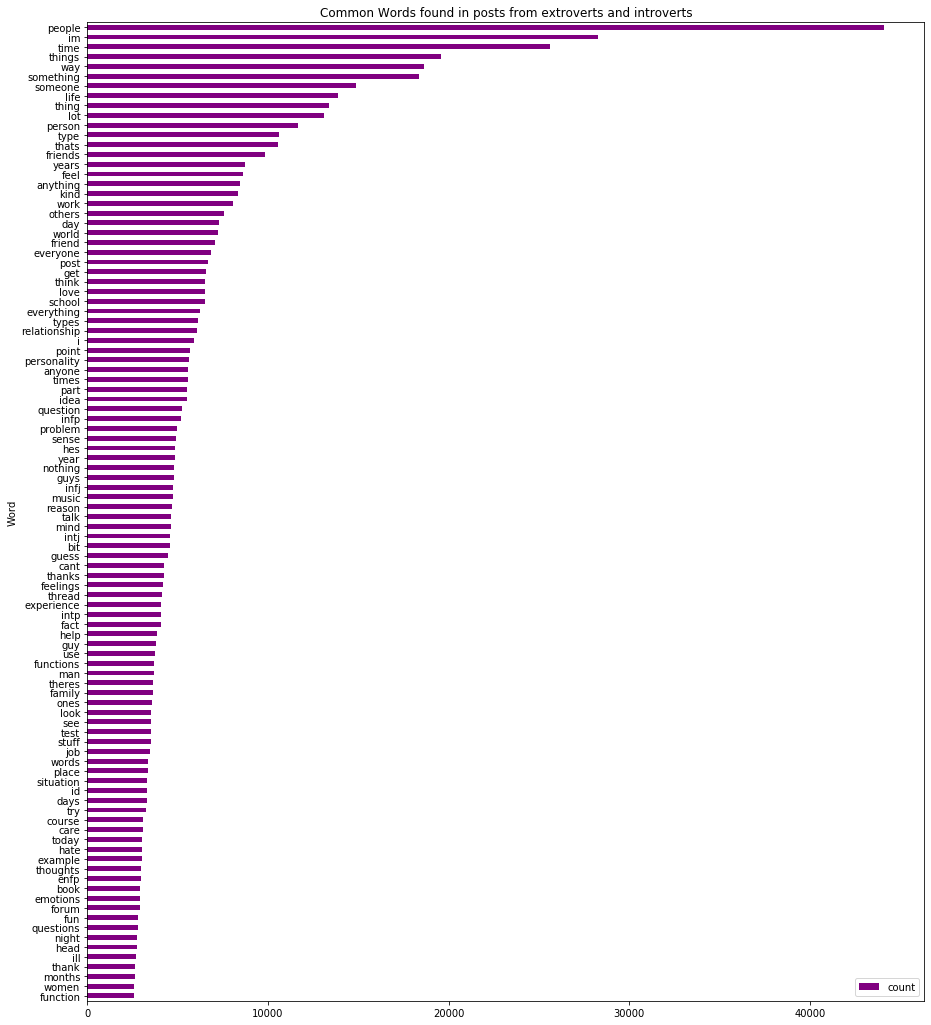

In [238]:
#let's look at common words graph

fig, ax = plt.subplots(figsize=(15,18))
top_words_df.sort_values(by='count').plot.barh(x='Word',y='count', ax=ax,color='purple')

ax.set_title("Common Words found in posts from extroverts and introverts")
plt.show()


In [55]:
# !pip install textblob      #for installation

# import textblob            #to import
# !pip install wordcloud
# from textblob import TextBlob, Word
# from wordcloud import WordCloud

#make wordcloud

In [239]:
word_counts = ' '.join(top_words_df['Word'].tolist())
print(type(word_counts))

#make a string out of the top words 

<class 'str'>


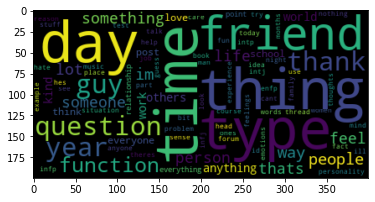

In [240]:
wordcloud = WordCloud().generate(word_counts)
plt.imshow(wordcloud, interpolation = 'bilinear')
#plt.axis('off')
plt.show()



In [241]:
df.head()

,personality_type,posts,energy,lower_posts,stopwords,lower_posts2,lower_postsnostopwords,lower_postsnostopwords2,new,lower_postswithoutpunc,lower_postsnolinks,char_count
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,236,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v= |||http:// .m...,httpwwwyoutubecomwatchvqsxhcwe3krwhttp41mediat...,intj moments sportscenter top ten plays pra...,2165
1,ENTP,'I'm finding the lack of me in these posts ver...,E,'i'm finding the lack of me in these posts ver...,556,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,im finding lack posts alarmingsex boring posit...,im finding lack posts alarmingsex boring posit...,3897
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,'good one _____ https://www.youtube.com/watch?...,359,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,good one httpswwwyoutubecomwatchvfhigbolffgwo...,good one course say know thats blessing curs...,3226
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,"'dear intp, i enjoyed our conversation the oth...",491,"'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...",dear intp enjoyed conversation day esoteric ga...,dear intp enjoyed conversation day esoteric ga...,3827
4,ENTJ,'You're fired.|||That's another silly misconce...,E,'you're fired.|||that's another silly misconce...,472,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,youre firedthats another silly misconception a...,youre firedthats another silly misconception a...,3452


In [242]:
#Let's lemmatize all of our text and make a new column

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(lower_postsnolinks):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(lower_postsnolinks)]

df['text_lemmatized'] = df.lower_postsnolinks.apply(lemmatize_text)



In [243]:
df.head()

,personality_type,posts,energy,lower_posts,stopwords,lower_posts2,lower_postsnostopwords,lower_postsnostopwords2,new,lower_postswithoutpunc,lower_postsnolinks,char_count,text_lemmatized
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,236,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v= |||http:// .m...,httpwwwyoutubecomwatchvqsxhcwe3krwhttp41mediat...,intj moments sportscenter top ten plays pra...,2165,"[intj, moment, sportscenter, top, ten, play, p..."
1,ENTP,'I'm finding the lack of me in these posts ver...,E,'i'm finding the lack of me in these posts ver...,556,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,im finding lack posts alarmingsex boring posit...,im finding lack posts alarmingsex boring posit...,3897,"[im, finding, lack, post, alarmingsex, boring,..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,'good one _____ https://www.youtube.com/watch?...,359,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,good one httpswwwyoutubecomwatchvfhigbolffgwo...,good one course say know thats blessing curs...,3226,"[good, one, course, say, know, thats, blessing..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,"'dear intp, i enjoyed our conversation the oth...",491,"'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...",dear intp enjoyed conversation day esoteric ga...,dear intp enjoyed conversation day esoteric ga...,3827,"[dear, intp, enjoyed, conversation, day, esote..."
4,ENTJ,'You're fired.|||That's another silly misconce...,E,'you're fired.|||that's another silly misconce...,472,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,youre firedthats another silly misconception a...,youre firedthats another silly misconception a...,3452,"[youre, firedthats, another, silly, misconcept..."


In [244]:
df.to_csv('dfrevised1.csv')
